# Apple Stock Analysis (1982- Present)

To allow multiple outputs.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install pandas-datareader

Installing the pandas-datareader package which allows you to obtain stock information

In [3]:
import pandas_datareader as pdr

In [4]:
import pandas as pd

In [14]:
from datetime import datetime

In [12]:
from pandas_datareader._utils import RemoteDataError

Getting the stock information for Apple from 1982 to today.

Creating a function with 3 parameters(ticker,start date and end date) as input and that returns a dataframe with the stock information

In [24]:
ticker = "AAPL"
def get_stock_data(ticker,start_year,end_year):
    start = datetime(start_year, 1, 1)
    end = datetime(end_year, 12, 31)
    data = pdr.DataReader(ticker, "yahoo", start, end)
    data['Symbol'] = ticker
    return data

stock_data = get_stock_data(ticker,1982,2017)

In [25]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
1982-01-04,0.395089,0.395089,0.392857,0.392857,0.017681,17813600,AAPL
1982-01-05,0.377232,0.377232,0.372768,0.372768,0.016777,8960000,AAPL
1982-01-06,0.370536,0.370536,0.368304,0.368304,0.016576,16520000,AAPL
1982-01-07,0.343750,0.343750,0.339286,0.339286,0.015270,17511200,AAPL
1982-01-08,0.354911,0.357143,0.354911,0.354911,0.015973,14151200,AAPL


Using %magic command to activate inline matplotlib graphs

In [27]:
%matplotlib inline

Overview of close series of Apple's stock

In [41]:
close = stock_data['Close']

In [42]:
close.describe()

count    9078.000000
mean       22.547216
std        39.303114
min         0.196429
25%         1.090179
50%         1.669643
75%        23.260000
max       176.419998
Name: Close, dtype: float64

Plotting close series

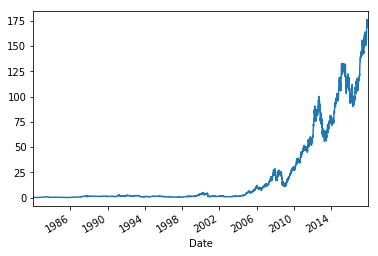

In [44]:
close.plot();

Sampling the closing prices of Apple:

In [45]:
stock_data['Close'].resample('AS').mean().tail()

Date
2013-01-01     67.519269
2014-01-01     92.264654
2015-01-01    120.040000
2016-01-01    104.604008
2017-01-01    150.551075
Freq: AS-JAN, Name: Close, dtype: float64

Obtaining maximum closing price:

Approach 1: Using max() 

In [53]:
c_max= close.max()
print("Maximum closing price through approach1 is %s" %(c_max))

Maximum closing price through approach1 is 179.259995


Finding timeframes with the highest stock price surge in five days (in % compared to the closing cost of the previous trading day)

Using pct_change

First calculate the percentage change in the stock prices for a period of 5 days: ((5th day price - 1st day price)*100) using pct_change which computes the percent change over a given number of period.

In [50]:
top_surge=close.pct_change(5).nlargest(5)

Next, take the top 5 surges by nlargest()

In [51]:
top_surge.head()

Date
1997-08-07    0.667858
1997-08-06    0.514388
1998-01-06    0.442857
1997-08-08    0.397393
1998-01-08    0.385715
Name: Close, dtype: float64

During August 1997, Microsoft saved Apple from bankcrupcy.Thus there was a surge in the stock prices
In 1987, Apple released MAcintosh which was a hit.Thus , there was a surge in stock prices

Resampling Close series to represent business quarters with a financial year that ends in September.

In [52]:
quarter_start = close.resample('BQ-SEP').mean()

Identifying series of four quarters with overall surge larger than 100 percent

Considering a rolling window of 4 quarters, compute the percentage change in stock price.
Formula : price_diff = stock price in Q4- stock price in Q1.This will give the surge and then we can find surge percentage.
1 quarter = 3 months

In [60]:
price_diff = quarter_start.pct_change(3)
surge_pct = price_diff*100

Then considering only top 5 records in series where the surge percentage is greater than 100% by masking the data like below:

In [59]:
surge_pct[(surge_pct>100)].nlargest(5)

Date
1983-06-30    244.412806
2005-03-31    175.793597
1983-03-31    174.650733
2000-03-31    167.956777
1987-09-30    155.883120
Name: Close, dtype: float64

Surges were because of the following incidents:
- 1983: John Sculley became the CEO of Apple; Apple began to ship the Lisa, which turned out to be overhyped.
- 1987: Apple began to ship the Mac II.
- 2000: Apple fills its product matrix with the iBook and announced its internet strategy.
- 2005: iPod at its peak.

Visulaizing the Surge Percentage data :

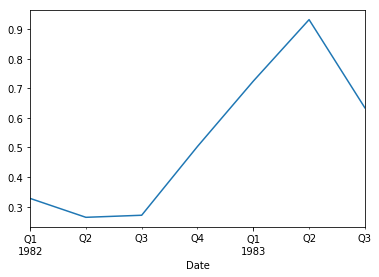

In [62]:
quarter_start[:'1983-09-30'].plot();

Worst possible "buy&sell" operation:
Finding the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized.

In [85]:
minimum_from_now_on = close.sort_index(ascending=False).cummin()

In [90]:
x=((close - minimum_from_now_on) / minimum_from_now_on).nlargest(1).index[0]

In [91]:
x

Timestamp('1991-04-02 00:00:00')

In [92]:
y = close[close == minimum_from_now_on[x]].index[0]
y

Timestamp('1982-10-22 00:00:00')

In [94]:
print('The worst day to buy was ' + str(x) +', when the price was ' + str(close[x]))
print('The worst day to sell was ' + str(y) +', when the price was ' + str(close[y]))
print('The loss is ' + str((close[x] - close[y]) * 100 / close[x]) + '%')

The worst day to buy was 1991-04-02 00:00:00, when the price was 2.598214
The worst day to sell was 1982-10-22 00:00:00, when the price was 0.462054
The loss is 82.2164763949%
